# TP N°4 :  Apprentissage non supervisé : Clustering

**Librairies utilisées**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
from sklearn import cluster, metrics

## Partie 1 : Dataset

**Chargement des données**

In [2]:
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0)

In [3]:
fromage.shape

(29, 9)

Le dataset contient initialement 29 lignes et 9 attributs.

Le tableau suivant montre les statistiques descriptives de ces données.

In [4]:
fromage.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


Les attributs de ces données  sont:

In [5]:
fromage.columns

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')

On affiche la matrice de distribution de données

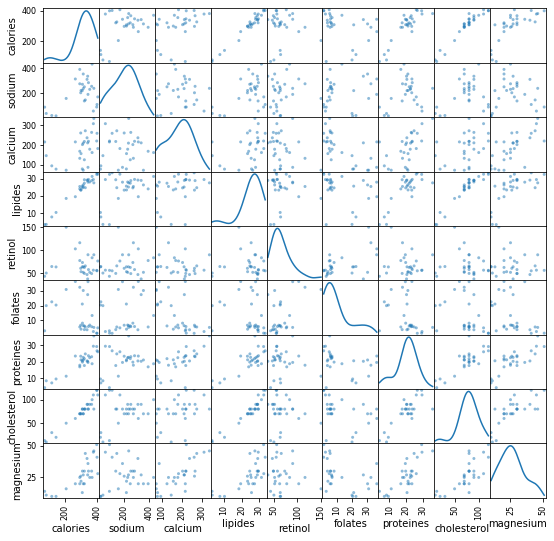

In [6]:
pd.plotting.scatter_matrix(fromage, figsize=(9,9),diagonal='kde')
plt.show()

➠ D'après ce graphe, on constate qu'il existe une forte corrélation entre **lipides**, **caloriees** et **cholestérol**.

## Partie 2 : K-means

Initialisation de l'algorithme k-means avec un nombre de classes égal à 4.

In [7]:
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)

Définition du modèle de clustering.

In [8]:
kmeans.fit(fromage)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Tableau des indices trié selon le cluster

In [9]:
idk = np.argsort(kmeans.labels_)

On affiche les fromages et leurs clusters équivalents.

In [10]:
pd.DataFrame(fromage.index[idk],kmeans.labels_[idk])

,Fromages
0,CarredelEst
0,Tome
0,PontlEveque
0,Chabichou
0,Chaource
0,Coulomniers
0,Fr.chevrepatemolle
1,Beaufort
1,SaintPaulin
1,Cheddar


On affiche les distances aux centres de classes

In [11]:
kmeans.transform(fromage)

array([[123.59715669, 285.36163076, 384.27301005, 145.46927992],
       [110.54651897, 118.43379084, 303.10311983,  71.72681089],
       [235.25665316,  56.72603293, 349.91323389, 218.1879268 ],
       [159.09984736, 200.30401971, 393.76898843,  45.60922494],
       [141.19170858, 210.31138298, 332.43471728,  84.66051854],
       [180.75982487, 111.73150994, 371.97076666,  86.99931839],
       [ 72.0404549 , 182.80599775, 298.65300308, 170.2611917 ],
       [ 57.86280572, 204.98823213, 311.48990553, 105.53037193],
       [156.41570984,  92.26223665, 348.48685233, 159.88151676],
       [224.31195752,  79.32509258, 333.83554522, 230.88643399],
       [ 39.94716153, 204.4018782 , 285.29211565, 155.61953412],
       [197.13338124,  43.74211715, 293.81905359, 172.55995306],
       [289.57992728, 102.59674855, 343.1669947 , 273.3780741 ],
       [144.41931015, 265.24828993, 195.86579908, 252.80069897],
       [164.74401355, 271.72958122, 400.47054979, 101.45152241],
       [307.24796873, 336

On  affiche les attributs des centres de chaque cluster.

In [12]:
kmeans.cluster_centers_

array([[297.85714286, 239.78571429, 103.84285714,  24.91428571,
         83.92857143,  23.05714286,  18.97142857,  71.42857143,
         21.71428571],
       [363.875     , 146.125     , 257.025     ,  29.05      ,
         63.6       ,   3.8625    ,  26.5625    ,  96.25      ,
         38.875     ],
       [101.75      ,  44.75      , 133.75      ,   6.275     ,
         55.15      ,  16.475     ,   7.2       ,  18.25      ,
         11.25      ],
       [329.8       , 306.6       , 206.82      ,  26.87      ,
         64.24      ,  11.91      ,  21.08      ,  82.        ,
         27.4       ]])

In [13]:
pd.DataFrame(data=kmeans.cluster_centers_,columns=fromage.columns)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,297.857143,239.785714,103.842857,24.914286,83.928571,23.057143,18.971429,71.428571,21.714286
1,363.875000,146.125000,257.025000,29.050000,63.600000,3.862500,26.562500,96.250000,38.875000
2,101.750000,44.750000,133.750000,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000
3,329.800000,306.600000,206.820000,26.870000,64.240000,11.910000,21.080000,82.000000,27.400000


**Détection du nombre adéquat de clusters**

[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


<function matplotlib.pyplot.show(*args, **kw)>

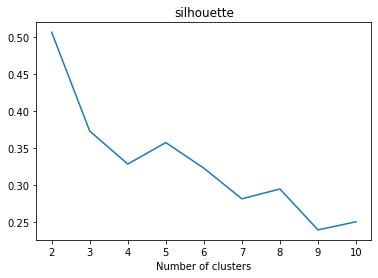

In [14]:
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)
#graphique
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

D'après le graphe ci-dessus, la valeur la plus élevée de la métrique silhouette est obtenue pour un nombre de cluster égal à 2. Donc cette valeur est la meilleure.

## Partie 3 : CAH

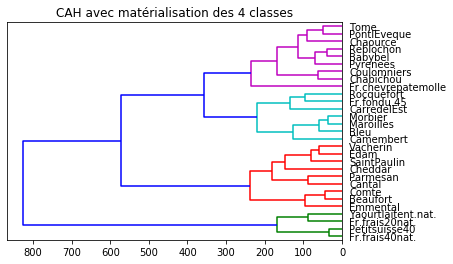

In [15]:
Z = linkage(fromage,method='ward', metric='euclidean')
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
idg = np.argsort(groupes_cah)

➠ D'après le dendrogramme, les clusters 1, 2 , 3 et 4 sont contitués respectivement de fromages frais,fromages à pâte pressée, fromages à pâte persillée  et fromages à pâte molle. On remarqeu que le cluster 1 (fromages frais) se distingue fortement des autres clusters. Donc on pourra faire un découpage en 2 clusters.

In [16]:
pd.DataFrame(fromage.index[idg],groupes_cah[idg])

,Fromages
1,Yaourtlaitent.nat.
1,Petitsuisse40
1,Fr.frais40nat.
1,Fr.frais20nat.
2,SaintPaulin
2,Beaufort
2,Cantal
2,Parmesan
2,Cheddar
2,Comte


In [17]:
pd.crosstab(groupes_cah, kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,8,0,1
3,1,0,0,6
4,6,0,0,3


➠ Il y a une correspondance exacte entre le cluster 3 des K-means et le cluster 1 de CAH.

## Partie 4 : ACP

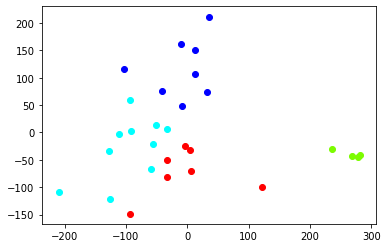

In [18]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

➠ On remarque que  le cluster 1 (fromages frais : lawngreen) est eloigné des autres clusters.

## La méthode CAH du package sklearn.cluster.AgglomerativeClustering

In [19]:
agg = cluster.AgglomerativeClustering(n_clusters = 4)
agg.fit(fromage)
idagg = np.argsort(agg.labels_)

In [20]:
pd.DataFrame(fromage.index[idagg],agg.labels_[idagg])

,Fromages
0,SaintPaulin
0,Beaufort
0,Parmesan
0,Cantal
0,Cheddar
0,Comte
0,Vacherin
0,Edam
0,Emmental
1,CarredelEst


In [21]:
pd.crosstab(agg.labels_, groupes_cah)

col_0,1,2,3,4
row_0,,,,
0,0,9,0,0
1,0,0,7,0
2,0,0,0,9
3,4,0,0,0


➠ On remarque qu'il a une correspondance exacte entre les clusters.

# Divisive Analysing

Implémentation de l'algorithme hiérarchique descendant.

In [25]:
clusters = []
clusters.append(fromage)
finish = False
level = 1
km = cluster.KMeans(n_clusters = 2)
while(finish == False):
    finish = True
    print("*******Level" ,level, "*******")
    for i in range(len(clusters)):
        print("cluster N°",i+1,":",clusters[i].index)
    clusters2 = []
    for i in range(len(clusters)):
        if(len(clusters[i].index)>1):
            finish = False
            km.fit(clusters[i])
            labels = km.labels_
            clusters2.append(clusters[i].iloc[[x-1 for x in (range(1,len(labels)+1)*labels)[range(1,len(labels)+1)*labels != 0]],:])
            labels = np.array([1-x for x in labels])
            clusters2.append(clusters[i].iloc[[x-1 for x in (range(1,len(labels)+1)*labels)[range(1,len(labels)+1)*labels != 0]],:])
        else:
            clusters2.append(clusters[i])
    clusters = clusters2
    level = level + 1

*******Level 1 *******
cluster N° 1 : Index(['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert', 'Cantal',
       'Chabichou', 'Chaource', 'Cheddar', 'Comte', 'Coulomniers', 'Edam',
       'Emmental', 'Fr.chevrepatemolle', 'Fr.fondu.45', 'Fr.frais20nat.',
       'Fr.frais40nat.', 'Maroilles', 'Morbier', 'Parmesan', 'Petitsuisse40',
       'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'SaintPaulin',
       'Tome', 'Vacherin', 'Yaourtlaitent.nat.'],
      dtype='object', name='Fromages')
*******Level 2 *******
cluster N° 1 : Index(['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert', 'Cantal',
       'Chabichou', 'Chaource', 'Cheddar', 'Comte', 'Coulomniers', 'Edam',
       'Emmental', 'Fr.fondu.45', 'Maroilles', 'Morbier', 'Parmesan',
       'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'SaintPaulin',
       'Tome', 'Vacherin'],
      dtype='object', name='Fromages')
cluster N° 2 : Index(['Fr.chevrepatemolle', 'Fr.frais20nat.', 'Fr.frais40nat.',
       'Peti